# Human Activity Recognition using TensorFlow.Keras

Here, I am considering to tackle the task that involves Human Activity Recognition database built from the recordings of 30 subjects performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The dataset can be found here: https://archive.ics.uci.edu/ml/datasets/Human+Activity+Recognition+Using+Smartphones.

# Dataset information

The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LYING) wearing a smartphone (Samsung Galaxy S II) on the waist, during the experiment execution. Using its embedded accelerometer and gyroscope, they captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.

# Attribute information

    - For each record in the dataset, a 561-feature vector with time and frequency domain variables has been provided.
    - Each feature vector is a row on the text file.
    - Features are normalized and bounded within [-1,1].
    - Also, each record contains the corresponding activity label out of six activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS, SITTING, STANDING, LYING) and an identifier of the subject who carried out the experiment ranging from 1 to 30.

The complete list of variables (561 in total) of each feature vector is available in the file 'features.txt'.

# Importing libraries & the datasets

In [ ]:
# Importing the required libraries
from autograd import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib import gridspec 
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras import models
from tensorflow.keras import layers 
from tensorflow.keras.utils import to_categorical 

Careful that all the .csv (X_train.csv, y_train.csv, X_test.csv & y_test.csv) datafiles must be in the same working directory as this jupyter notebook (FinalProject_400285158.ipynb).

In [ ]:
# importing training dataset and their corresponding labels 
csvname1 = 'X_train.csv'
csvname2 = 'y_train.csv'

X_train = np.loadtxt(csvname1, delimiter = ',', skiprows = 1) 
y_train = np.loadtxt(csvname2, delimiter = ',', skiprows = 1)

# importing testing dataset and their corresponding labels 
csvname3 = 'X_test.csv'
csvname4 = 'y_test.csv'

X_test = np.loadtxt(csvname3, delimiter = ',', skiprows = 1) 
y_test = np.loadtxt(csvname4, delimiter = ',', skiprows = 1) 

Here, I have converted the original datafiles to .csv extensions in order to access the feature vectors and labels easily.

In [ ]:
# Dimensions of the imported datasets
print(X_train.shape)
print(y_train.shape) 
print(X_test.shape)
print(y_test.shape)  

(7352, 561)
(7352,)
(2947, 561)
(2947,)


There are in total 7352 and 2947 feature vectors in the original training and testing set respectively. Each vector is composed of 561 distinct features stored in the X datapoints and their corresponding labels are listed out of six associated activities performed by all 30 participants.

In [ ]:
# Here, y_prime and y_test_prime are adjusted to zero-indexed labels for y_train and y_test respectively.
# This is done to accomodate the categorical values of our labels

y_prime = y_train - 1
y_test_prime = y_test - 1

# checking the aforementioned operation
print('Actual labels:',y_train) 
print('Zero-indexed labels:',y_prime) 

Actual labels: [5. 5. 5. ... 2. 2. 2.]
Zero-indexed labels: [4. 4. 4. ... 1. 1. 1.]


Notice here, y_prime and y_test_prime are adjusted to zero-indexed labels for y_train and y_test datasets respectively. This is done to accomodate the categorical values of our labels in one-hot encoding. Hence, we will refer the following scheme of activity indexes for the remainder of the exercises; 

    Label   Activity
        0   Walking
        1   Walking Upstairs
        2   Walking Downstairs
        3   Sitting
        4   Standing
        5   Lying

# One-hot encoding

In [ ]:
# Converting the labels to one-hot-encoded using our zero-indexed arrays 

y_c = to_categorical (y_prime) 
y_test_c = to_categorical (y_test_prime) 

In [ ]:
# checking whether we get the desired output

print('Training label of the first element is:',y_prime[0],'and its one-hot-encoded vector is:',y_c[0]) 
# print(y_c[0]) 
# print('Testing label of the first element is:',y_test_prime[0],' and the one-hot-encoded value is:',y_test_c[0])
# print(y_test_c[0]) 

Training label of the first element is: 4.0 and its one-hot-encoded vector is: [0. 0. 0. 0. 1. 0.]


# Building the training model using keras.tensorflow

In [ ]:
# Building the model using keras.tensorflow with three hidden layers 
# parameters and activation functions fed to the model as follows:

model = models.Sequential([
  layers.Flatten(),                           # to flatten the input shape                     
  layers.Dense(500, activation='relu'),       # dense layer of 500 units with with activation function = ReLU
  layers.Dense(250, activation='sigmoid'),    # dense layer of 250 units with with activation function = sigmoid
  layers.Dense(50, activation='relu'),       # dense layer of 50 units with with activation function = ReLU
  layers.Dense(6, activation='softmax')       # dense layer of 6 units with softmax activation, that outputs prediction probabilities
])

# Building the model by inputting the training dataset 
model.build(X_train.shape) 

In [ ]:
# Compiling the model with the categorical crossentropy cost 

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']) 

model.summary() 

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_3 (Flatten)          (7352, 561)               0         
_________________________________________________________________
dense_12 (Dense)             (7352, 500)               281000    
_________________________________________________________________
dense_13 (Dense)             (7352, 250)               125250    
_________________________________________________________________
dense_14 (Dense)             (7352, 50)                12550     
_________________________________________________________________
dense_15 (Dense)             (7352, 6)                 306       
Total params: 419,106
Trainable params: 419,106
Non-trainable params: 0
_________________________________________________________________


Our model is handling almost half a million parameters here.

In [ ]:
# fitting the model with 10 epochs 
history = model.fit(X_train, y_c, epochs=10, batch_size=128)

# Evaluating the loss history and the accuracy history 
accuracy_history = history.history['accuracy']
loss_history = history.history['loss']

Epoch 1/10
58/58 [==============================] - 1s 4ms/step - loss: 0.7581 - accuracy: 0.7350
Epoch 2/10
58/58 [==============================] - 0s 4ms/step - loss: 0.2289 - accuracy: 0.9136
Epoch 3/10
58/58 [==============================] - 0s 4ms/step - loss: 0.1422 - accuracy: 0.9467
Epoch 4/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0960 - accuracy: 0.9634
Epoch 5/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0708 - accuracy: 0.9742
Epoch 6/10
58/58 [==============================] - 0s 4ms/step - loss: 0.1034 - accuracy: 0.9572
Epoch 7/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0674 - accuracy: 0.9724
Epoch 8/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0600 - accuracy: 0.9767
Epoch 9/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0604 - accuracy: 0.9774
Epoch 10/10
58/58 [==============================] - 0s 4ms/step - loss: 0.0483 - accuracy: 0.9831


In [ ]:
print('Our trained model attains the accuracy of',accuracy_history[-1],'on the training module, after 10 epochs.')

Our trained model attains the accuracy of 0.983133852481842 on the training module, after 10 epochs.


# Plotting

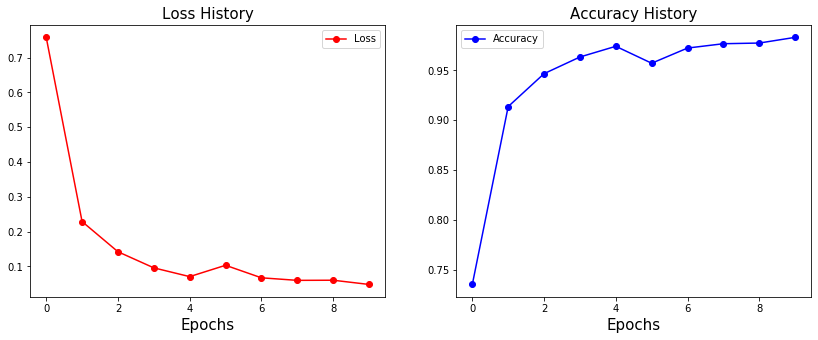

In [ ]:
# Plotting the accuracy and the loss history
fig, ax = plt.subplots(1,2,figsize = (14,5)) 

ax[0].plot(loss_history,'-or', label="Loss") 
ax[0].set_title("Loss History", fontsize=15)
ax[0].set_xlabel("Epochs", fontsize=15)
ax[0].legend()

ax[1].plot(accuracy_history,'-ob', label="Accuracy") 
ax[1].set_title("Accuracy History", fontsize = 15) 
ax[1].set_xlabel("Epochs", fontsize=15)
ax[1].legend()

plt.show()  

Comment on the plots generated above:

After the first few iterations, the model does not fit the datapoints any significantly, and thus, they can be rendered redundant after certain number of epochs.

# Evaluating our model

In [ ]:
# Evaluating the accuracy of our model on the testing dataset

test_loss, test_acc = model.evaluate(X_test, y_test_c)
print('test accuracy:', test_acc) 

93/93 [==============================] - 0s 1ms/step - loss: 0.1656 - accuracy: 0.9437
test accuracy: 0.9436715245246887


In [ ]:
print('Our trained model attains the accuracy of',test_acc,'on the testing set.')

Our trained model attains the accuracy of 0.9436715245246887 on the testing set.


In [ ]:
# Classifications is the array containing probabilities of predicted labels in the testing dataset

test_classifications = model.predict(X_test)
train_classifications = model.predict(X_train) 

# checking 
print('Probabilities of a random feature vector:\n',test_classifications[199])
print('\nCorresponding predicted label (zero-indexed):',np.argmax(test_classifications[199]))
print('Corresponding actual label (zero-indexed):',y_test_prime[199])  

Probabilities of a random feature vector:
 [1.17227166e-04 9.56435906e-06 3.64125754e-06 9.49063063e-01
 5.07743992e-02 3.21318221e-05]

Corresponding predicted label (zero-indexed): 3
Corresponding actual label (zero-indexed): 3.0


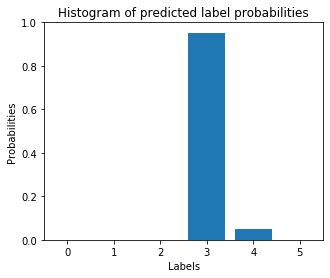

In [ ]:
# Example of a histogram of probabilities 

i_probs = list(test_classifications[199]) 
i_labels = list(range(6))  

fig, ax = plt.subplots(figsize=(5,4))

ax.bar (i_labels, i_probs) 
ax.set_ylim (0.0, 1.0)  
ax.set_xlim (-0.5, 5.5) 
ax.set_xticks(i_labels)
ax.set_xlabel("Labels")
ax.set_ylabel("Probabilities")
ax.set_title("Histogram of predicted label probabilities")

plt.show() 

In [ ]:
# Predicting the labels of the testing dataset 
y_hat_test = np.argmax(test_classifications, axis = 1) 

# Predicting the labels of the training dataset 
y_hat_train = np.argmax(train_classifications, axis = 1)

print('Predicted testing labels (y_hat_test):',y_hat_test) 
print('Predicted training labels (y_hat_train):',y_hat_train)  

Predicted testing labels (y_hat_test): [4 4 4 ... 1 1 1]
Predicted training labels (y_hat_train): [4 4 4 ... 1 1 1]


Note that the labels are zero-indexed to be consistent with the y_prime & y_test_prime dataset in this context.

# Confusion matrix

In [ ]:
# Generating the confusion matrix on the testing dataset using the utility tensorflow.math.confusion_matrix

print('Confusion matrix on the testing dataset:') 

tf.math.confusion_matrix(
    y_test_prime,
    y_hat_test
) 

Confusion matrix on the testing dataset:


<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[489,   1,   6,   0,   0,   0],
       [ 37, 432,   1,   0,   1,   0],
       [  7,  27, 386,   0,   0,   0],
       [  0,   2,   0, 436,  53,   0],
       [  0,   0,   0,  23, 509,   0],
       [  0,   0,   0,   0,   8, 529]], dtype=int32)>

In [ ]:
# Generating the confusion matrix on the training dataset using the utility tensorflow.math.confusion_matrix

print('Confusion matrix on the training dataset:') 

tf.math.confusion_matrix(
    y_prime,
    y_hat_train
) 

Confusion matrix on the training dataset:


<tf.Tensor: shape=(6, 6), dtype=int32, numpy=
array([[1226,    0,    0,    0,    0,    0],
       [   0, 1073,    0,    0,    0,    0],
       [   0,    0,  986,    0,    0,    0],
       [   0,    0,    0, 1239,   47,    0],
       [   0,    0,    0,   55, 1319,    0],
       [   0,    0,    0,    0,    0, 1407]], dtype=int32)>

Aforementioned is the confusion matrix for each of the 6 activities incorporating the predictions achieved by the trained model. True predictions lie on the diagonal axis of the matrix and the off-diagonal elements depict the misclassified predictions of our model.

# Subject Activities

In [ ]:
df1 = 'subject_train.txt'
subject_train = np.loadtxt(df1) 

df2 = 'subject_test.txt'  
subject_test = np.loadtxt(df2) 

print(subject_train.shape)
print(subject_test.shape)  

(7352,)
(2947,)


In [ ]:
# Subject_activity function computes the "predicted" series of activities that a certain subject performs.

def subject_activity (subject, array1, array2):
    # array1 contains subjects, performing activities.
    # array2 contains activity labels. Usually we will input the labels predicted by our trained model.
    inds = []
    out = []
    
    # First, we pick out the subject oriented activities
    for i in range(len(array1)):
        if (array1[i] == subject):
            inds.append(i)
    
    c = np.zeros(6) # c acts as a counter. 
    for j in inds:
        if (array2[j] == 0) and (c[0] == 0):
            out.append('Walking')
            c[0] += 1
        elif (array2[j] == 1) and (c[1] == 0):
            out.append('Walking Upstairs')
            c[1] += 1
        elif (array2[j] == 2) and (c[2] == 0):
            out.append('Walking Downstairs')
            c[2] += 1
        elif (array2[j] == 3) and (c[3] == 0):
            out.append('Sitting')
            c[3] += 1
        elif (array2[j] == 4) and (c[4] == 0):
            out.append('Standing')
            c[4] += 1
        elif (array2[j] == 5) and (c[5] == 0):
            out.append('Lying')
            c[5] += 1
    return out

In [ ]:
my_arr = subject_activity (2, subject_test, y_hat_test) 
print('Series of activities performed by the subject 2:\n',my_arr)  

Series of activities performed by the subject 2:
 ['Standing', 'Sitting', 'Lying', 'Walking', 'Walking Downstairs', 'Walking Upstairs']
